<a href="https://colab.research.google.com/github/ankalagigaurave/ML_SEM_V/blob/master/Labs/ML_Lab_4_J004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
 
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2
 )
 
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [ ]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [ ]:
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407


In [ ]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [ ]:
df_can.drop(['AREA','REG','Coverage','Type'],axis='columns',inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent.Region','DevName':'Development Status'},inplace=True)
df_can

,Country,Continent,Continent.Region,DEV,Development Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


In [ ]:
df_can.set_index('Country',inplace=True)
df_can['TotalCount']=df_can.sum(axis='columns')
years=range(1980,2014)

In [ ]:
df_can.loc['India']

Continent                           Asia
Continent.Region           Southern Asia
DEV                                  902
Development Status    Developing regions
1980                                8880
1981                                8670
1982                                8147
1983                                7338
1984                                5704
1985                                4211
1986                                7150
1987                               10189
1988                               11522
1989                               10343
1990                               12041
1991                               13734
1992                               13673
1993                               21496
1994                               18620
1995                               18489
1996                               23859
1997                               22268
1998                               17241
1999                               18974
2000            

In [ ]:
df_can.columns

Index([         'Continent',   'Continent.Region',                'DEV',
       'Development Status',                 1980,                 1981,
                       1982,                 1983,                 1984,
                       1985,                 1986,                 1987,
                       1988,                 1989,                 1990,
                       1991,                 1992,                 1993,
                       1994,                 1995,                 1996,
                       1997,                 1998,                 1999,
                       2000,                 2001,                 2002,
                       2003,                 2004,                 2005,
                       2006,                 2007,                 2008,
                       2009,                 2010,                 2011,
                       2012,                 2013,         'TotalCount'],
      dtype='object')

In [ ]:
df_can.dtypes

Continent             object
Continent.Region      object
DEV                    int64
Development Status    object
1980                   int64
1981                   int64
1982                   int64
1983                   int64
1984                   int64
1985                   int64
1986                   int64
1987                   int64
1988                   int64
1989                   int64
1990                   int64
1991                   int64
1992                   int64
1993                   int64
1994                   int64
1995                   int64
1996                   int64
1997                   int64
1998                   int64
1999                   int64
2000                   int64
2001                   int64
2002                   int64
2003                   int64
2004                   int64
2005                   int64
2006                   int64
2007                   int64
2008                   int64
2009                   int64
2010          

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl


In [ ]:
df_continents=df_can.groupby('Continent',axis=0).sum()

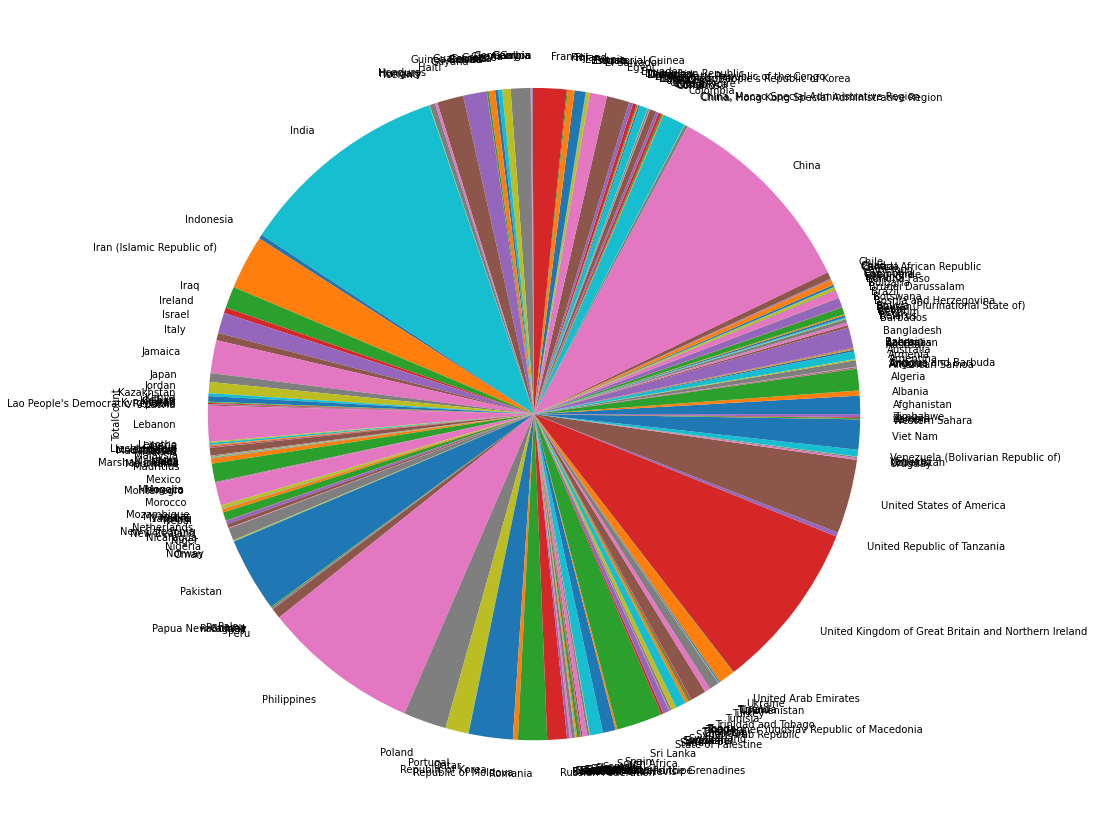

In [ ]:
#Pie Charts
df_can['TotalCount'].plot(kind='pie',figsize=(15,15))

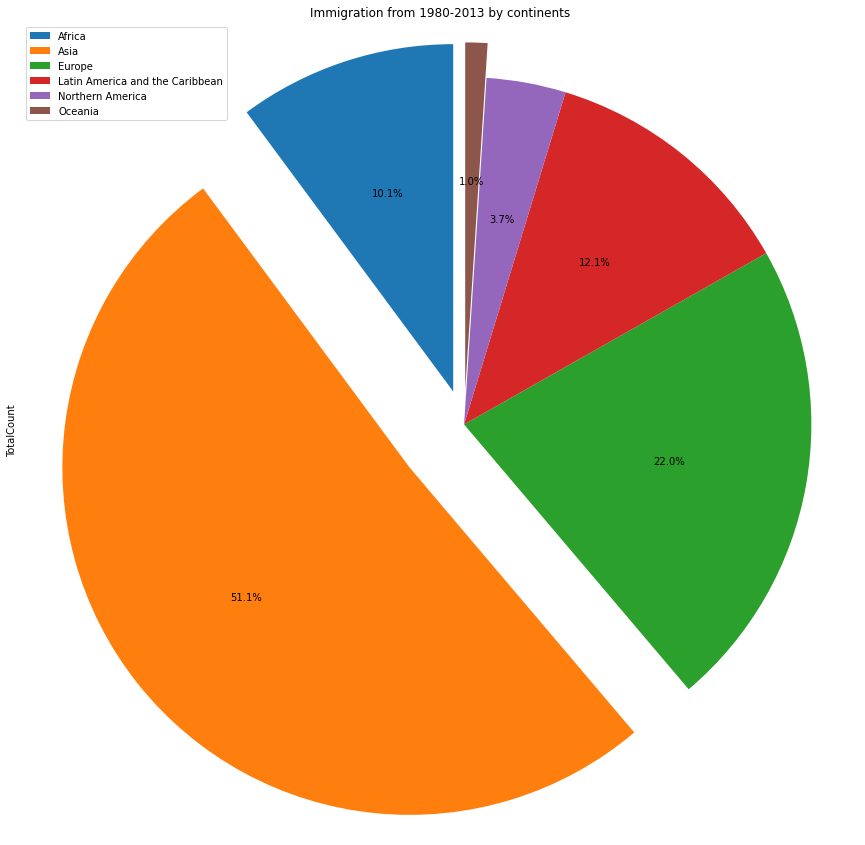

In [ ]:
explodelist = [0.1,0.2,0,0,0,0.1]

df_continents['TotalCount'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=False,
    labels=None,
    explode=explodelist
)

plt.title('Immigration from 1980-2013 by continents')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

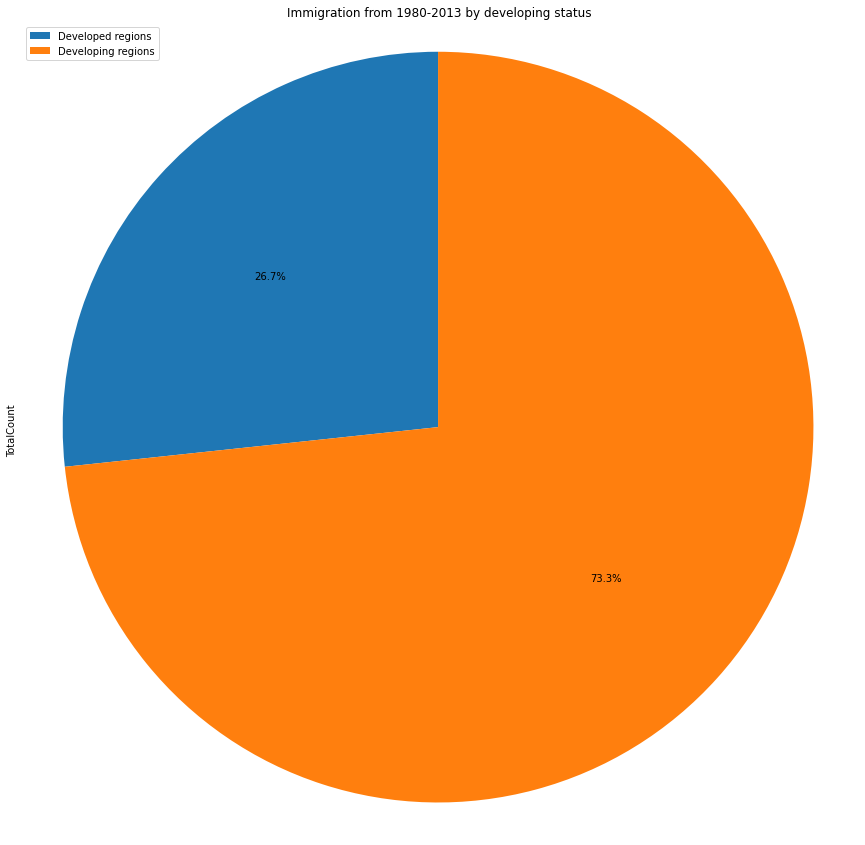

In [ ]:
# plot pie chart of dev status 

df_devstatus = df_can.groupby(by='Development Status', axis='index').sum()

df_devstatus.head()


df_devstatus['TotalCount'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=False,
    labels=None
)

plt.title('Immigration from 1980-2013 by developing status')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=df_devstatus.index, loc='upper left')
plt.show()

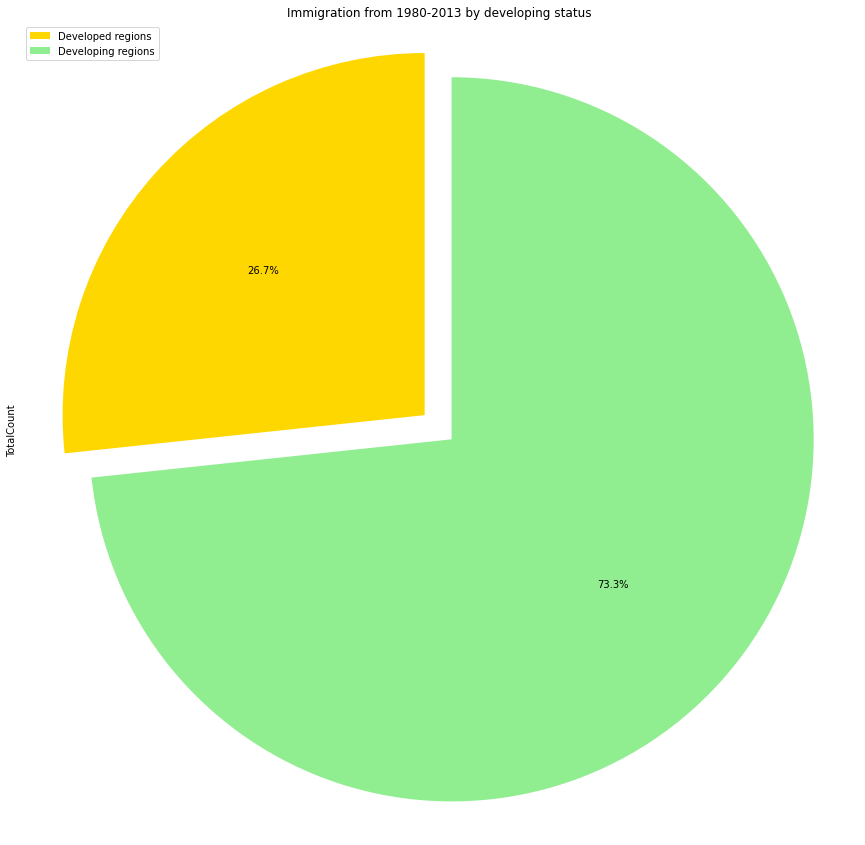

In [ ]:
# plot pie chart of dev status 



colorlist = ['gold', 'lightgreen']
explodelist = [0,0.1]


df_devstatus['TotalCount'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=False,
    labels=None,
    colors=colorlist,
    explode=explodelist
)

plt.title('Immigration from 1980-2013 by developing status')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=df_devstatus.index, loc='upper left')
plt.show()

In [ ]:
df_continent_reg=df_can.groupby(by='Continent.Region',axis=0).sum()
df_continent_reg


,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalCount
Continent.Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia and New Zealand,1802,1304,1119,848,457,481,467,532,675,610,790,890,867,1075,1238,936,878,918,804,625,687,811,1159,1068,1221,1280,1279,1193,1383,1498,1538,1423,1226,1399,1536,36017
Caribbean,11726,7045,8310,8326,6998,5553,6048,8716,10932,9229,10786,11596,12887,14975,16569,9936,9976,9293,8121,6298,6714,7072,8433,7507,6502,6630,6816,6652,7826,8862,8847,10549,11958,11898,10393,319979
Central America,7216,734,921,1612,3648,4087,4862,5909,6804,5596,5821,7750,13474,12521,7769,3529,2836,3390,3469,2665,2866,3080,3157,3010,2747,3346,3990,4140,5039,4891,4814,5692,5821,6019,5644,168869
Central Asia,4510,0,0,0,0,0,0,0,0,0,0,0,0,15,81,89,105,230,728,1052,717,619,728,706,825,995,1134,903,936,805,962,905,769,1029,691,19534
Eastern Africa,15334,1471,1641,1426,1094,1187,1134,1454,2734,3237,4094,4404,6535,9729,7244,4046,4373,4254,3094,3056,3936,4825,4868,4049,5808,7726,7083,6750,6669,6705,6922,8591,8956,8846,9448,182723
Eastern Asia,6313,6836,8895,5481,3254,2624,2979,3416,5403,5887,7796,10544,17364,15258,14543,17091,18726,23667,25521,27142,38665,44651,47564,40598,44886,43550,50306,41763,35591,39602,37497,37954,35159,40449,40539,847514
Eastern Europe,9010,1467,3698,6873,5459,4433,3969,6144,8861,11499,18671,20244,19753,17510,14201,11294,11984,13325,14089,13978,14670,16527,18846,18615,17117,18360,16724,14389,13886,11988,11759,11803,9612,9464,10011,430233
Melanesia,3608,632,707,816,558,391,448,362,524,564,736,1174,1621,1790,1317,1021,675,623,448,388,361,462,647,611,567,497,300,278,304,331,313,401,316,273,233,24297
Micronesia,3608,1,0,0,1,0,0,0,0,1,2,0,0,0,1,0,1,1,0,2,1,2,4,2,4,1,2,1,3,1,2,0,0,2,1,3644


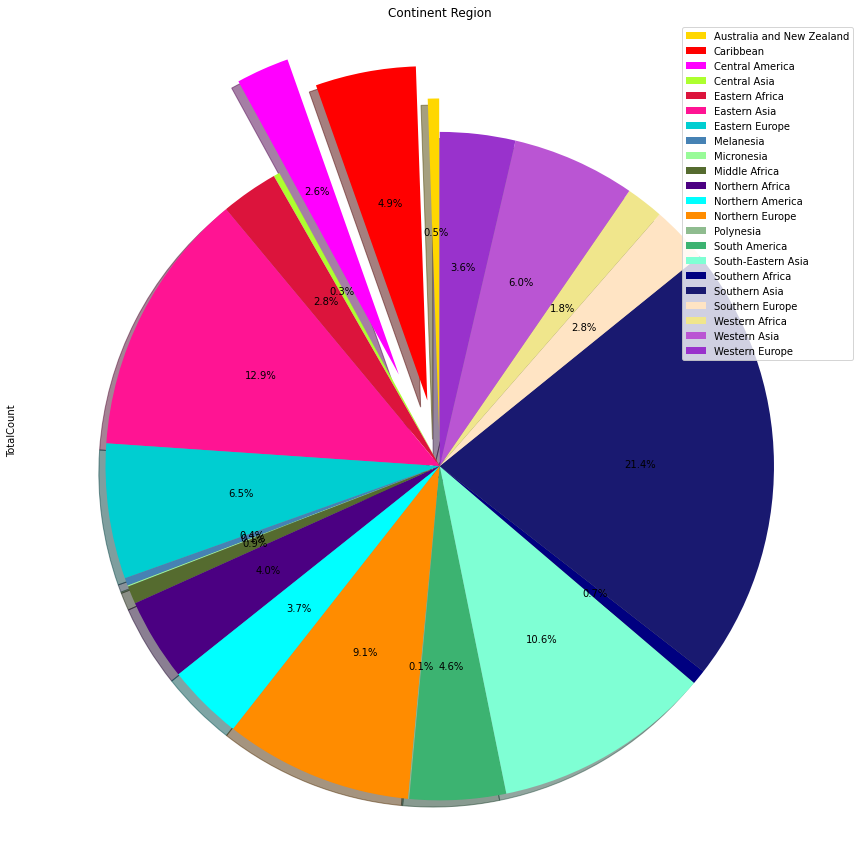

In [ ]:
colorlist1=['gold','red','magenta','greenyellow','crimson','deeppink','darkturquoise','steelblue','palegreen'
,'darkolivegreen','indigo','aqua','darkorange','darkseagreen','mediumseagreen','aquamarine','navy','midnightblue','bisque','khaki',
'mediumorchid','darkorchid']
explodelist=(0.1,0.2,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)


df_continent_reg['TotalCount'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=True,
    colors=colorlist1,
    explode=explodelist,
    labels=None,
  
    )
plt.title('Continent Region')
plt.axis('equal')
plt.legend(labels=df_continent_reg.index,loc='upper right')
plt.show()


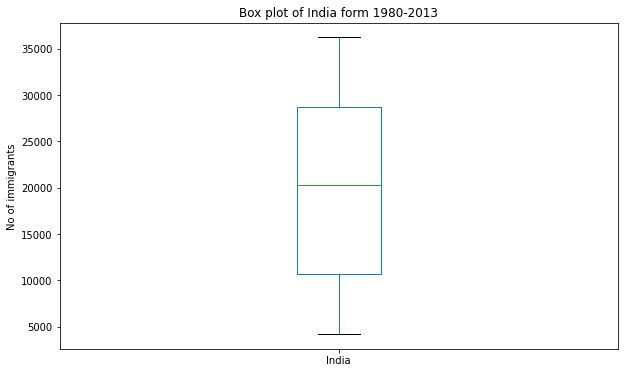

In [ ]:
#boxplot-outliers
df_india=df_can.loc['India',years]

df_india.plot(
    kind='box',
    figsize=(10,6)
)
plt.title('Box plot of India form 1980-2013')
plt.ylabel('No of immigrants')
plt.show()

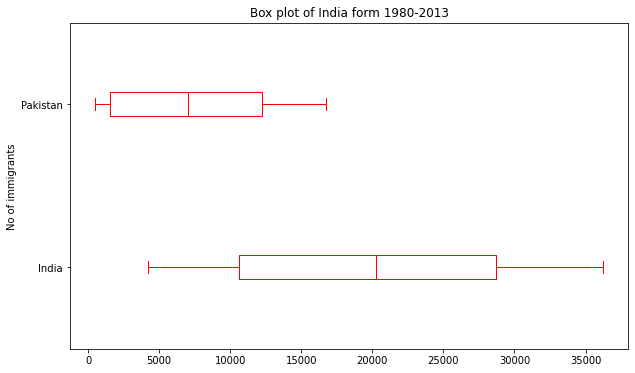

In [ ]:
df_indopak=df_can.loc[['India','Pakistan'],years].transpose()

df_indopak.plot(
    kind='box',
    figsize=(10,6),
    color='red',
    vert=False

)
plt.title('Box plot of India form 1980-2013')
plt.ylabel('No of immigrants')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: Setti

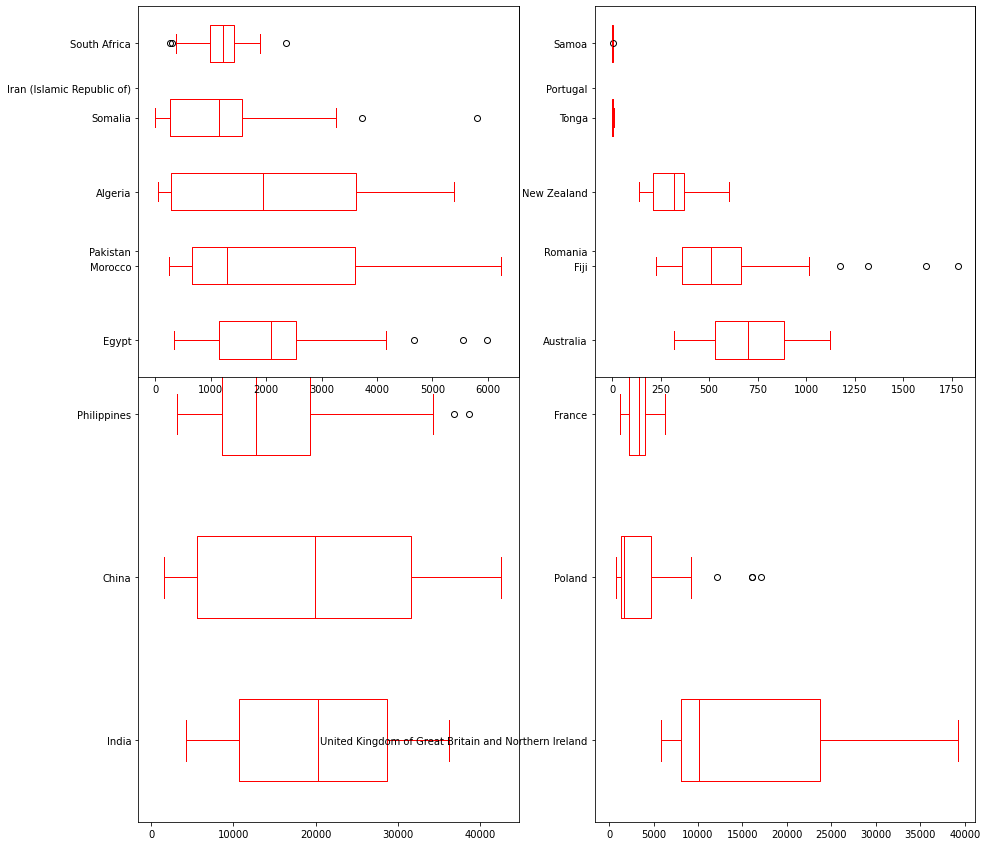

In [ ]:
# top 5 of Asia and top 5 of Europe
df_asia=df_can[(df_can['Continent']=='Asia')]
df_eur=df_can[(df_can['Continent']=='Europe')]
df_africa=df_can[(df_can['Continent']=='Africa')]
df_ocean=df_can[(df_can['Continent']=='Oceania')]
                
df_asia.sort_values('TotalCount',ascending=False,inplace=True)
df_eur.sort_values('TotalCount',ascending=False,inplace=True)
df_africa.sort_values('TotalCount',ascending=False,inplace=True)
df_ocean.sort_values('TotalCount',ascending=False,inplace=True)

fig=plt.figure()
df1=df_asia[years].head(5).transpose()
df2=df_eur[years].head(5).transpose()
df3=df_africa[years].head(5).transpose()
df4=df_ocean[years].head(5).transpose()

ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
df1.plot(kind='box',figsize=(15,15),color='red',vert=False,ax=ax0)

df2.plot(kind='box',figsize=(15,15),color='red',vert=False,ax=ax1)



ax2=fig.add_subplot(2,2,1)
ax3=fig.add_subplot(2,2,2)
df3.plot(kind='box',figsize=(15,15),color='red',vert=False,ax=ax2)

df4.plot(kind='box',figsize=(15,15),color='red',vert=False,ax=ax3)

plt.show()

In [ ]:
df1.describe()

Q1 = 8663.000000
Q3 = 19249.000000
IQR = Q3-Q1

Outlier1 = Q3+1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)


df1[df1['Philippines']>Outlier1]

35128.0
-7216.0


Country,India,China,Philippines,Pakistan,Iran (Islamic Republic of)
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479


In [ ]:
#scatter plot - bubble plot

df_indopak

df_indopak.reset_index(inplace=True)

df_indopak.rename(columns={'Country':'index','index':'Year'}, inplace=True)

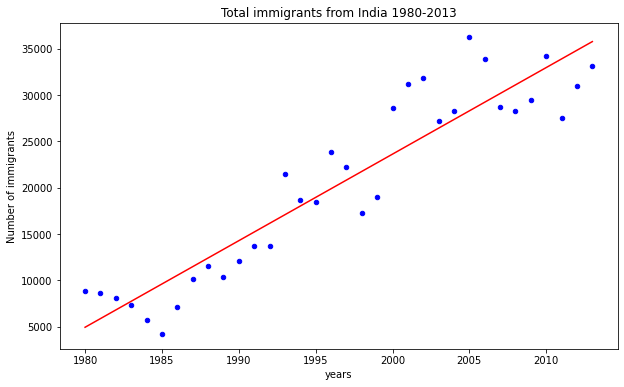

In [ ]:
import numpy as np

x=df_indopak['Year']
y=df_indopak['India']
fit = np.polyfit(x,y,deg=1)


df_indopak.plot(
    kind='scatter',
    x='Year',
    y='India',
    color='blue',
    figsize=(10,6)
)
plt.title('Total immigrants from India 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")

plt.plot(x, fit[0]*x+fit[1], color='red')
plt.show()

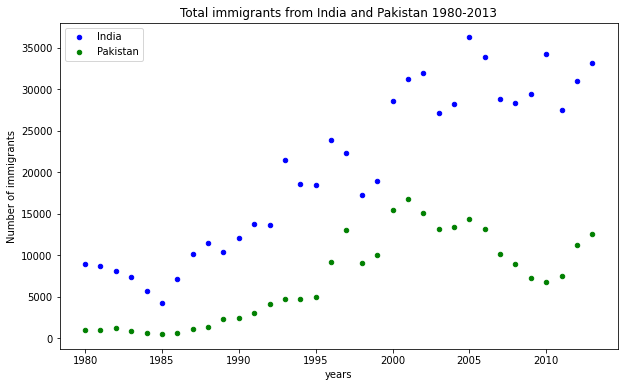

In [ ]:
ax0 = df_indopak.plot(
    kind='scatter',
    x='Year',
    y='India',
    color='blue',
    figsize=(10,6)
)

df_indopak.plot(
    kind='scatter',
    x='Year',
    y='Pakistan',
    color='green',
    figsize=(10,6),
    ax=ax0
)


plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')


plt.show()

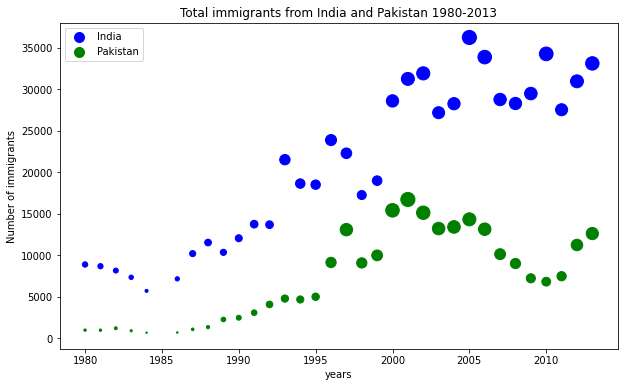

In [ ]:
#bubble plot
#normalization - min max norm
#Xnew = (X - Xmin)/(Xmax - Xmin) 

norm_india = (df_indopak['India'] - df_indopak['India'].min()) / (df_indopak['India'].max() - df_indopak['India'].min())
norm_pak = (df_indopak['Pakistan'] - df_indopak['Pakistan'].min()) / (df_indopak['Pakistan'].max() - df_indopak['Pakistan'].min())



ax0 = df_indopak.plot(
    kind='scatter',
    x='Year',
    y='India',
    color='blue',
    figsize=(10,6),
    s=norm_india*200
)

df_indopak.plot(
    kind='scatter',
    x='Year',
    y='Pakistan',
    color='green',
    figsize=(10,6),
    ax=ax0,
    s=norm_pak*200
)


plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax0.legend(['India','Pakistan'], loc='upper left')


plt.show()

#Waffle Charts
A waffle chart is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [ ]:
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Continent.Region,DEV,Development Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalCount
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,901,Developed regions,272,293,299,106,93,73,93,109,129,129,118,111,158,186,93,111,70,83,63,81,93,81,70,89,89,62,101,97,108,81,92,93,94,81,4802
Norway,Europe,Northern Europe,901,Developed regions,116,77,106,51,31,54,56,80,73,76,83,103,74,92,60,65,70,104,31,36,56,78,74,77,73,57,53,73,66,75,46,49,53,59,3228
Sweden,Europe,Northern Europe,901,Developed regions,281,308,222,176,128,158,187,198,171,182,130,167,179,203,192,176,161,151,123,170,138,184,149,161,129,205,139,193,165,167,159,134,140,140,6767


In [ ]:
width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['TotalCount'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 130
Norway: 87
Sweden: 183


<Figure size 432x288 with 0 Axes>

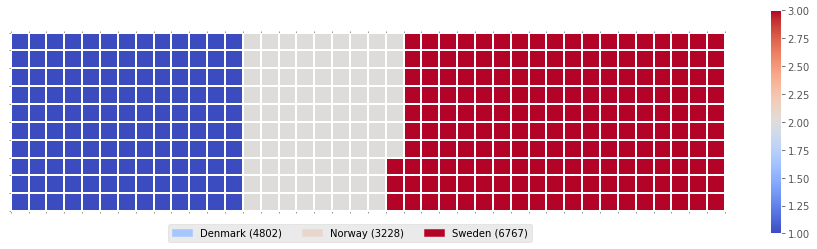

In [ ]:
create_waffle_chart(categories, values, height, width, colormap)

Total number of tiles is 400
Denmark: 174
Norway: 61
Sweden: 166


<Figure size 432x288 with 0 Axes>

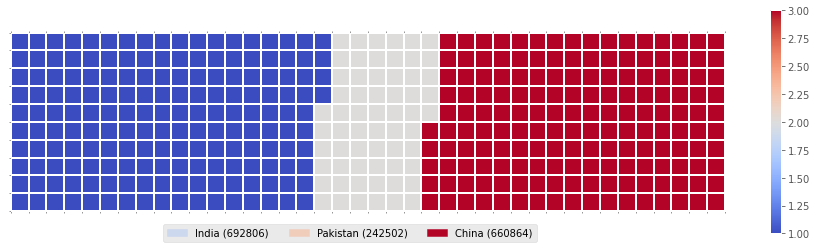

In [ ]:
# let's create a new dataframe for these three countries 
df_dsn1 = df_can.loc[['India', 'Pakistan', 'China'], :]

width = 40 # width of chart
height = 10 # height of chart

categories1= df_dsn1.index.values # categories
values = df_dsn1['TotalCount'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories1, values, height, width, colormap)

In [ ]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


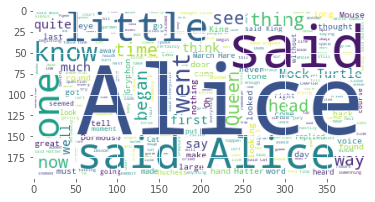

In [ ]:
#Step 1: stopwords removals - 

stopwordsremove = set(STOPWORDS)

#Step2: create an object of class WordCloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwordsremove
)

#step3 : use object to call function

alice_wc.generate(alice_novel)

plt.imshow(alice_wc)
plt.show()

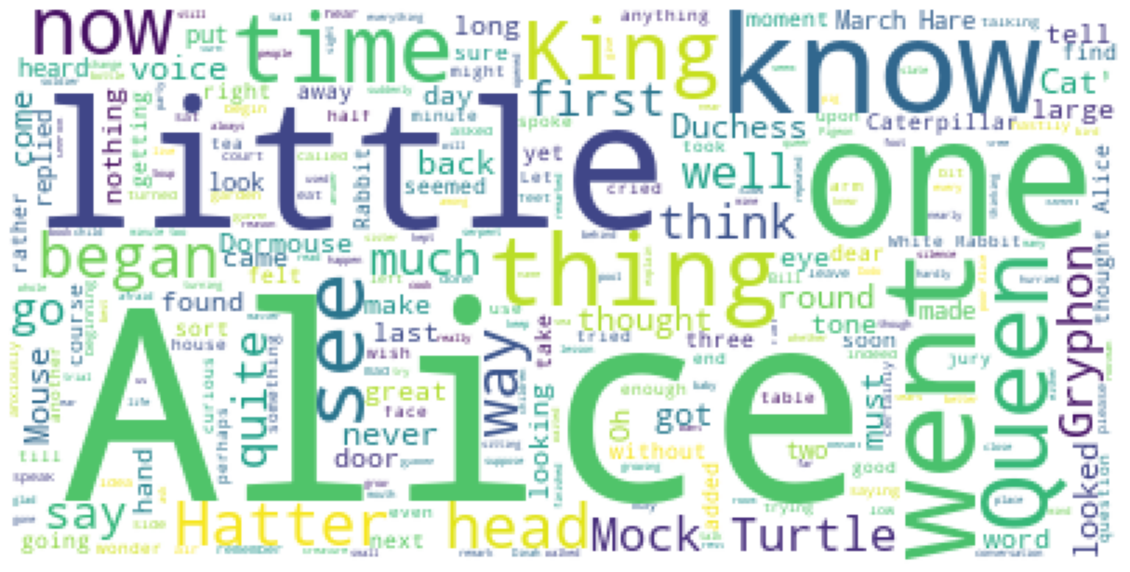

In [ ]:
#Step 1: stopwords removals - 
stopwordsremove = set(STOPWORDS)
stopwordsremove.add('said')

#Step2: create an object of class WordCloud
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwordsremove
)

#step3 : use object to call function
alice_wc.generate(alice_novel)

#figure dimensions
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.imshow(alice_wc) #display results
plt.axis('off') # turn off axis
plt.show()

In [ ]:
import numpy as np

import pandas as pd

import folium

In [ ]:
#latitude and longitude in location
#zoom_start gives level of zoom
#higher the better

worldmap = folium.Map(location=[56.130, -106.35], zoom_start=10)

worldmap

In [ ]:
#black and white
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=10, tiles='Stamen Toner')

worldmap

In [ ]:
#natural vegetation
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=1, tiles='Stamen Terrain')

worldmap

In [ ]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

df_incidents.head()

df_incidents.shape

Dataset downloaded and read into a pandas dataframe!


(150500, 13)

In [ ]:
limit=100
df1 = df_incidents.iloc[0:limit,:]

In [ ]:
latitude= 37.77
longitude = -122.42

map1 = folium.Map(location = [latitude, longitude], zoom_start=12)

map1

In [ ]:
#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)

map1

#incident we will impose on the map

incident = folium.map.FeatureGroup()


#reduce size of dataset
df1 = df_incidents.iloc[0:limit,:]


#loop through the crimes by their lat Y and long X and create markers

for lat, long in zip(df1.Y, df1.X):
    incident.add_child(
        folium.CircleMarker(
            [lat, long],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue'
        ).add_to(incident)
    )

#add pop ups

lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.Marker(
            [lat, long],
            popup=labs
        ).add_to(map1)
    


#add incidents/crimes to the map
map1.add_child(incident)

In [ ]:
#given information about city coordinates
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

#incident we will impose on the map
incident = folium.map.FeatureGroup()


#reduce size of dataset
df1 = df_incidents.iloc[0:limit,:]


#loop through the crimes by their lat Y and long X and create markers

lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.CircleMarker(
            [lat, long],
            popup=labs,
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue'
        ).add_to(map1)
    


#add incidents/crimes to the map
map1

In [ ]:
#given information about city coordinates
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

#incident we will impose on the map
from folium import plugins
incident = plugins.MarkerCluster().add_to(map1)


#reduce size of dataset
df1 = df_incidents.iloc[0:limit,:]



#cluster markers



#loop through the crimes by their lat Y and long X and create markers

lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.CircleMarker(
            [lat, long],
            popup=labs,
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue'
        ).add_to(incident)
    


#add incidents/crimes to the map
map1

In [ ]:
df_can

,Continent,Continent.Region,DEV,Development Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalCount
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,59541
Albania,Europe,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,16600
Algeria,Africa,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,70341
American Samoa,Oceania,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,908
Andorra,Europe,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112,98048
Western Sahara,Africa,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,904
Yemen,Asia,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217,3887


In [ ]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


Now that we have the GeoJSON file, let's create a world map, centered around [0, 0] latitude and longitude values, with an intial zoom level of 2, and using Mapbox Bright style

In [ ]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

world_map

And now to create a Choropleth map, we will use the choropleth method with the following main parameters:

1.geo_data, which is the GeoJSON file.

2.data, which is the dataframe containing the data.

3.columns, which represents the columns in the dataframe that will be used to create the Choropleth map.

4.key_on, which is the key or variable in the GeoJSON file that contains the name of the variable of interest. To determine that, you will need to open the GeoJSON file using any text editor and note the name of the key or variable that contains the name of the countries, since the countries are our variable of interest. In this case, name is the key in the GeoJSON file that contains the name of the countries. Note that this key is case_sensitive, so you need to pass exactly as it exists in the GeoJSON file.

In [ ]:
df_can.reset_index(inplace=True)

In [ ]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'TotalCount'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


As per our Choropleth map legend, the darker the color of a country and the closer the color to red, the higher the number of immigrants from that country. Accordingly, the highest immigration over the course of 33 years (from 1980 to 2013) was from China, India, and the Philippines, followed by Poland, Pakistan, and interestingly, the US.

Notice how the legend is displaying a negative boundary or threshold. Let's fix that by defining our own thresholds and starting with 0 instead of -6,918!

In [ ]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['TotalCount'].min(),
                              df_can['TotalCount'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'TotalCount'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
